In [1]:
import tempfile
import os
import numpy as np
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout

# import tensorflow_model_optimization as tfmot

In [2]:
# SecureML
def BasicNN():
    model = Sequential()

    model.add(Flatten(input_shape=(28,28,1)))
    model.add(Dense(128,activation='relu'))
    model.add(Dense(128,activation='relu'))
    model.add(Dense(10,activation='softmax'))

    return model

def MiniONN():
    model = Sequential()

    model.add(Conv2D(16,(5,5),strides=(1,1),input_shape=(28,28,1), padding='valid',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(16,(5,5),strides=(1,1),input_shape=(12,12,16), padding='valid',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten()) # 16x4x4
    model.add(Dense(100,activation='relu'))
    model.add(Dense(10,activation='softmax'))

    return model


def LeNet():
    model = Sequential()

    model.add(Conv2D(20,(5,5),strides=(1,1),input_shape=(28,28,1),padding='valid',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(50,(5,5),strides=(1,1),padding='valid',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(500,activation='relu'))
    model.add(Dense(10,activation='softmax'))

    model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

    return model

def AlexNet():
    model = Sequential()

    model.add(Conv2D(96,(11,11),strides=(4,4),input_shape=(227,227,3),padding='valid',activation='relu',kernel_initializer='uniform'))
    model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

    model.add(Conv2D(256,(5,5),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
    model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

    model.add(Conv2D(384,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
    model.add(Conv2D(384,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
    model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
    model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(256,activation='relu'))
    # model.add(Dropout(0.5))
    model.add(Dense(256,activation='relu'))
    # model.add(Dropout(0.5))
    model.add(Dense(10,activation='softmax'))

    model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

    return model

def VGG16():
    model = Sequential()

    model.add(Conv2D(64,(3,3), strides = (1,1), input_shape = (224,224,3), padding = 'same', activation = 'relu'))
    model.add(Conv2D(64,(3,3), strides = (1,1), padding = 'same', activation = 'relu'))
    model.add(MaxPooling2D((2,2), strides = (2,2)))

    model.add(Conv2D(128,(3,3), strides = (1,1), padding = 'same', activation = 'relu'))
    model.add(Conv2D(128,(3,3), strides = (1,1), padding = 'same', activation = 'relu'))
    model.add(MaxPooling2D((2,2), strides = (2,2)))

    model.add(Conv2D(256,(3,3), strides = (1,1), padding = 'same', activation = 'relu'))
    model.add(Conv2D(256,(3,3), strides = (1,1), padding = 'same', activation = 'relu'))
    model.add(Conv2D(256,(3,3), strides = (1,1), padding = 'same', activation = 'relu'))
    model.add(MaxPooling2D((2,2), strides = (2,2)))

    model.add(Conv2D(512,(3,3), strides = (1,1), padding = 'same', activation = 'relu'))
    model.add(Conv2D(512,(3,3), strides = (1,1), padding = 'same', activation = 'relu'))
    model.add(Conv2D(512,(3,3), strides = (1,1), padding = 'same', activation = 'relu'))
    model.add(MaxPooling2D((2,2), strides = (2,2)))

    model.add(Conv2D(512,(3,3), strides = (1,1), padding = 'same', activation = 'relu'))
    model.add(Conv2D(512,(3,3), strides = (1,1), padding = 'same', activation = 'relu'))
    model.add(Conv2D(512,(3,3), strides = (1,1), padding = 'same', activation = 'relu'))
    model.add(MaxPooling2D((2,2), strides = (2,2)))

    model.add(Flatten())
    model.add(Dense(4096, activation = 'relu'))
    model.add(Dense(4096, activation = 'relu'))
    model.add(Dense(1000, activation = 'softmax'))

    return model

In [3]:
model = MiniONN()
# model.summary()


for layer in model.layers:
    print("[{0}]{1}, {2}".format(str(layer.name), str(layer.input_shape), str(layer.output_shape)))

    shape = (layer.output_shape, layer.input_shape)
    # print(shape)

# input shape = (224, 224, 3)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
[conv2d](None, 28, 28, 1), (None, 24, 24, 16)
[max_pooling2d](None, 24, 24, 16), (None, 12, 12, 16)
[conv2d_1](None, 12, 12, 16), (None, 8, 8, 16)
[max_pooling2d_1](None, 8, 8, 16), (None, 4, 4, 16)
[flatten](None, 4, 4, 16), (None, 256)
[dense](None, 256), (None, 100)
[dense_1](None, 100), (None, 10)


Before: (10, 5308416), After: (11, 11796480)
[conv2d_17](None, 224, 224, 3), (None, 224, 224, 64)
------Handle convolution
[conv2d_18](None, 224, 224, 64), (None, 224, 224, 64)
------Handle convolution
[max_pooling2d_9](None, 224, 224, 64), (None, 112, 112, 64)
------Handle max pooling
[conv2d_19](None, 112, 112, 64), (None, 112, 112, 128)
------Handle convolution
[conv2d_20](None, 112, 112, 128), (None, 112, 112, 128)
------Handle convolution
[max_pooling2d_10](None, 112, 112, 128), (None, 56, 56, 128)
------Handle max pooling
[conv2d_21](None, 56, 56, 128), (None, 56, 56, 256)
------Handle convolution
[conv2d_22](None, 56, 56, 256), (None, 56, 56, 256)
------Handle convolution
[conv2d_23](None, 56, 56, 256), (None, 56, 56, 256)
------Handle convolution
[max_pooling2d_11](None, 56, 56, 256), (None, 28, 28, 256)
------Handle max pooling
[conv2d_24](None, 28, 28, 256), (None, 28, 28, 512)
------Handle convolution
[conv2d_25](None, 28, 28, 512), (None, 28, 28, 512)
------Handle convoluti

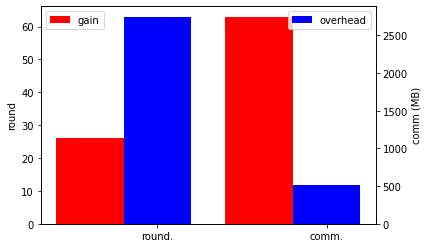

((26, 23060135424), (63, 4345079040))

In [9]:

def matrix_mul(output, bits):
    size = output[0] * output[1]
    return 1, size * 1 * bits

def dot_mul(output, bits):
    return matrix_mul((output[1], 1), bits)


### 1. KS adder can be vecotrized
### 2. 2 Rotate to generate two random zero share is not necessary
def MSB(input, bits):
    size = input[0] * input[1]

    per_round = (1 + int(np.ceil(np.log2(bits))) + 1)
    per_comm =  (1 + 2* int(np.ceil(np.log2(bits))) + 1) * bits
    return per_round, per_comm * size

def Bit2AByXor(input, bits):
    size = input[0] * input[1]

    per_round = 2
    per_comm = 2 * bits
    return per_round, per_comm * size

### Currently, zeno not implemented
### 1. One rotate can be liminated through calling 2 3PC-OT
def Bit2AByOT(input, bits):
    size = input[0] * input[1]

    per_round = 1       # currently zeno = 2
    per_comm = 2 * bits
    return per_round, per_comm * size

### a_0 * [b]^B + (a_1 + a_2) * [b]^B
def BitMulAByOT(input, bits):
    size = input[0] * input[1]

    per_round = 1       # currently zeno = 2
    per_comm = 4 * bits
    return per_round, per_comm * size

### [a]^A * Bit2AByOT([b]^B)
def BitMulAByInjection(input, bits):
    size = input[0] * input[1]

    per_round = 1 + 1
    per_comm = (2 + 1) * bits
    return per_round, per_comm * size

def relu(input, bits):
    return MSB(input, bits)[0] + BitMulAByOT(input, bits)[0], MSB(input, bits)[1] + BitMulAByOT(input, bits)[1]

# Bit2A + Mul
def select_share(input, bits):
    size = input[0] * input[1]

    per_round = 1 + 1
    per_comm = (2 + 1) * bits
    return per_round, per_comm * size

# Bit2A + Mul
def select_share_boolean(input, bits):
    size = input[0] * input[1]

    per_round = 1 + 1
    per_comm = (2 + 1) * bits
    return per_round, per_comm * size

### Refer to Falcon
### [a0, a1, a2, a3,]
#  (a0 a1) (a2, a3) MSB, 
def MaxPooling(pool_size, input, bits):
    size = input[0] * input[1]

    compare_count = int(np.ceil(np.log2(pool_size)))
    per_round = compare_count * (MSB((1, 1), bits)[0] + select_share((1, 1), bits)[0])
    per_comm = (pool_size - 1) * (MSB((1, 1), bits)[1] + select_share((1, 1), bits)[1] + pool_size * bits) # 每一轮 一次MSB, 一次select_share 乘法（max），一次 size=pool_size ANDBB（index）

    return per_round, per_comm * size

def conv_complexity(input_shape, output_shape, filter_shape, bits):
    W = output_shape[1]
    H = output_shape[2]

    f_w = filter_shape[0]
    f_h = filter_shape[1]

    c_in = input_shape[3]
    c_out = output_shape[3]

    # 1. Deduce conv --> matrix multiplication shape
    lhs_shape_mul = (W*H, f_w*f_h*c_in)
    rhs_shape_mul = (f_w*f_h*c_in, c_out)

    res_shape = (W*H, c_out)

    # 2. Matrix Mul
    return matrix_mul(res_shape, bits)

def conv_and_relu_complexity(input_shape, output_shape, filter_shape, bits):
    W = output_shape[1]
    H = output_shape[2]

    f_w = filter_shape[0]
    f_h = filter_shape[1]

    c_in = input_shape[3]
    c_out = output_shape[3]

    # 1. Deduce conv --> matrix multiplication shape
    lhs_shape_mul = (W*H, f_w*f_h*c_in)
    rhs_shape_mul = (f_w*f_h*c_in, c_out)

    res_shape = (W*H, c_out)

    # 2. Matrix Mul + ReLU
    # return matrix_mul(res_shape, bits) + relu(res_shape, bits)
    return tuple_add(matrix_mul(res_shape, bits), relu(res_shape, bits))

def dense_complexity(input_shape, output_shape, bits):
    lhs_shape = input_shape[1]
    rhs_shape = output_shape[1]

    return dot_mul(output_shape, bits)

def dense_relu_complexity(input_shape, output_shape, bits):
    return tuple_add(dot_mul(output_shape, bits), relu((output_shape[1], 1), bits))

def tuple_add(ta, tb):
    l = len(ta)
    return tuple([ta[i] + tb[i] for i in range(l)])

def tuple_minus(ta, tb):
    l = len(ta)
    return tuple([ta[i] - tb[i] for i in range(l)])


def Pos_share_extension(input, bits_before, bits_after):
    size = input[0] * input[1]

    per_round = 3
    per_comm = 2 * bits_before + 1 * bits_after + 1 * bits_before + 2 * bits_after
    return per_round, per_comm * size 

def drop_out(input, bits):
    # 1. Random sample random bit, with probability p = 1, (1-p) = 0
    # 2. BitMulA in forward
    size = input[0] * input[1]

    per_round = 1       # currently zeno = 2
    per_comm = 4 * bits
    return per_round, per_comm * size


# num_list1 = [1.5,0.6,7.8,6]
# num_list2 = [1,0.3,5.5,3]

# def draw_plot(num_list1, num_list2):
#     plt.bar(range(len(num_list1)), num_list1,fc='r')
#     plt.bar(range(len(num_list2)), num_list2,fc='g')
#     plt.show()

# draw_plot(num_list1, num_list2)

verbose = False
def main(model, bit_before, bit_after):
    input_shape = (None, 28, 28, 1)
    output_shape = (None, 24, 24, 16)

    filter_shape = (5, 5)
    pool_size = 2 * 2

    before = conv_and_relu_complexity(input_shape, output_shape, filter_shape, bit_before)
    after = conv_and_relu_complexity(input_shape, output_shape, filter_shape, bit_after)

    print("Before: {0}, After: {1}".format(before, after))

    gain = (0, 0)
    overhead = (0, 0)
    for layer in model.layers:
        if not verbose:
            print("[{0}]{1}, {2}".format(str(layer.name), str(layer.input_shape), str(layer.output_shape)))
        input_shape = layer.input_shape
        output_shape = layer.output_shape
        if layer.name.startswith('conv2d'):
            if not verbose:
                print("------Handle convolution")
            gain = tuple_add(gain, tuple_minus(conv_and_relu_complexity(input_shape, output_shape, filter_shape, bit_after), conv_and_relu_complexity(input_shape, output_shape, filter_shape, bit_before)))

            overhead = tuple_add(overhead, Pos_share_extension((output_shape[1] * output_shape[2], output_shape[3]), bit_before, bit_after))
        elif layer.name.startswith('max_pooling2d'):
            if not verbose:
                print('------Handle max pooling')
            in_shape = (input_shape[1]*input_shape[2], input_shape[3])
            gain = tuple_add(gain, tuple_minus(MaxPooling(pool_size, in_shape, bit_after), MaxPooling(pool_size, in_shape, bit_before)))

            overhead = tuple_add(overhead, Pos_share_extension((output_shape[1] * output_shape[2], output_shape[3]), bit_before, bit_after))

        elif layer.name.startswith('dense'):
            if not verbose:
                print('------Handle Dense')
            gain = tuple_add(gain, tuple_minus(dense_relu_complexity(input_shape, output_shape, bit_after), dense_relu_complexity(input_shape, output_shape, bit_before)))
            overhead = tuple_add(overhead, Pos_share_extension((output_shape[1], 1), bit_before, bit_after))

        elif layer.name.startswith('dropout'):
            if not verbose:
                print('------Handle Dropout')
            gain = tuple_add(gain, tuple_minus(drop_out((input_shape[1],1), bit_after), drop_out((input_shape[1],1), bit_before)))
            # no overhead, since only BitMulA is required for mask and gradients.
    
    """
    Plt
    """
    import matplotlib.pyplot as plt

    fig = plt.figure()
    
    ax1 = fig.add_subplot()
    ax2 = ax1.twinx()

    name_list = ['round.', 'comm.']
    total_width, num_para = 0.8, 2
    width = total_width / num_para

    idx = list(range(len(name_list)))
    idx_ = list(range(len(name_list)))

    for i in range(len(name_list)):
        idx_[i] = idx_[i] + width

    gain_round, gain_comm = gain
    overhead_round, overhead_comm = overhead

    ax1.bar(idx, (gain_round, overhead_round), width=width, label='gain', fc='r')
    ax2.bar(idx_, (gain_comm * 1.0 / (1 << 23), overhead_comm * 1.0 / (1 << 23)), width=width, label='overhead', fc='b', tick_label = name_list)

    ax1.set_ylabel('round')
    ax2.set_ylabel('comm (MB)')
    ax1.legend(loc='upper left')
    ax2.legend()
    plt.show()

    
    return gain, overhead

model = VGG16()
main(model, 32, 64)